### CASE STUDY 1

# BRAZIL HACKATHON

In [2]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

## Importing file

In [3]:
data=pd.read_csv(r"C:\Users\ALFIN\Downloads\NIIT PYTHON\DS1_C5_S3_BazilHousing_Data_Hackathon_CASE STUDY.csv")

In [59]:
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [60]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [61]:
data.shape

(10692, 13)

In [62]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [63]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 3.0 MB


In [64]:
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

No null values.

# Level 1
* Separating Categorical and numerical columns

In [5]:
def columns_a(data):
    categorical=[]
    numerical=[]
    for column in data.columns:
        if data[column].nunique()<40:
            categorical.append(column)
        else:
            numerical.append(column)
    return categorical,numerical
categorical,numerical=columns_a(data)

print("Categorical Columns : ",categorical)
print("Numerical columns : ",numerical)

Categorical Columns :  ['city', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture']
Numerical columns :  ['area', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']


In [6]:
cat=data.loc[:,categorical]
cat

,city,rooms,bathroom,parking spaces,floor,animal,furniture
0,São Paulo,2,1,1,7,acept,furnished
1,São Paulo,4,4,0,20,acept,not furnished
2,Porto Alegre,1,1,1,6,acept,not furnished
3,Porto Alegre,2,1,0,2,acept,not furnished
4,São Paulo,1,1,0,1,not acept,not furnished
...,...,...,...,...,...,...,...
10687,Porto Alegre,2,1,1,5,not acept,furnished
10688,São Paulo,4,4,4,17,acept,not furnished
10689,Rio de Janeiro,3,3,0,8,not acept,furnished
10690,Rio de Janeiro,2,2,2,8,acept,furnished


In [7]:
num=data.drop(categorical,axis=1)
num

,area,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70,2065,3300,211,42,5618
1,320,1200,4960,1750,63,7973
2,80,1000,2800,0,41,3841
3,51,270,1112,22,17,1421
4,25,0,800,25,11,836
...,...,...,...,...,...,...
10687,63,402,1478,24,22,1926
10688,285,3100,15000,973,191,19260
10689,70,980,6000,332,78,7390
10690,120,1585,12000,279,155,14020


In [8]:
def count(ax,count='no_of_rows'):
    for bar in ax.patches:
        percentage= f'{round(bar.get_height(),2)}'
        x=bar.get_x()+bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage,(x,y),va='bottom',ha='center')
count(ax,count='no_of_rows')

# Level 1 analysis categorical column

In [69]:
cat.columns

Index(['city', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal',
       'furniture'],
      dtype='object')

In [70]:
def info_of_cat(data):
    for col in categorical:
        unique_values=data[col].unique()
        mode_value=data[col].mode()[0]
        missing_values=data[col].isnull().sum()

        print(f"Unique values in '{col}' are: {unique_values}")
        print(f"Mode of '{col}' is {mode_value}")
        print(f"Number of missing values in '{col}' is {missing_values}")

        if missing_values>0:
            print(f"There are {missing_values} missing values in the '{col}' column")
        print("\n")
info_of_cat(data)

Unique values in 'city' are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of 'city' is São Paulo
Number of missing values in 'city' is 0


Unique values in 'rooms' are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of 'rooms' is 3
Number of missing values in 'rooms' is 0


Unique values in 'bathroom' are: [ 1  4  3  2  6  5  7  9  8 10]
Mode of 'bathroom' is 1
Number of missing values in 'bathroom' is 0


Unique values in 'parking spaces' are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of 'parking spaces' is 1
Number of missing values in 'parking spaces' is 0


Unique values in 'floor' are: [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
Mode of 'floor' is 0
Number of missing values in 'floor' is 0


Unique values in 'animal' are: ['acept' 'not acept']
Mode of 'animal' is acept
Number of missing values in 'animal' is 0


Unique values in 'furniture' are: ['furnished' 

In [71]:
#city

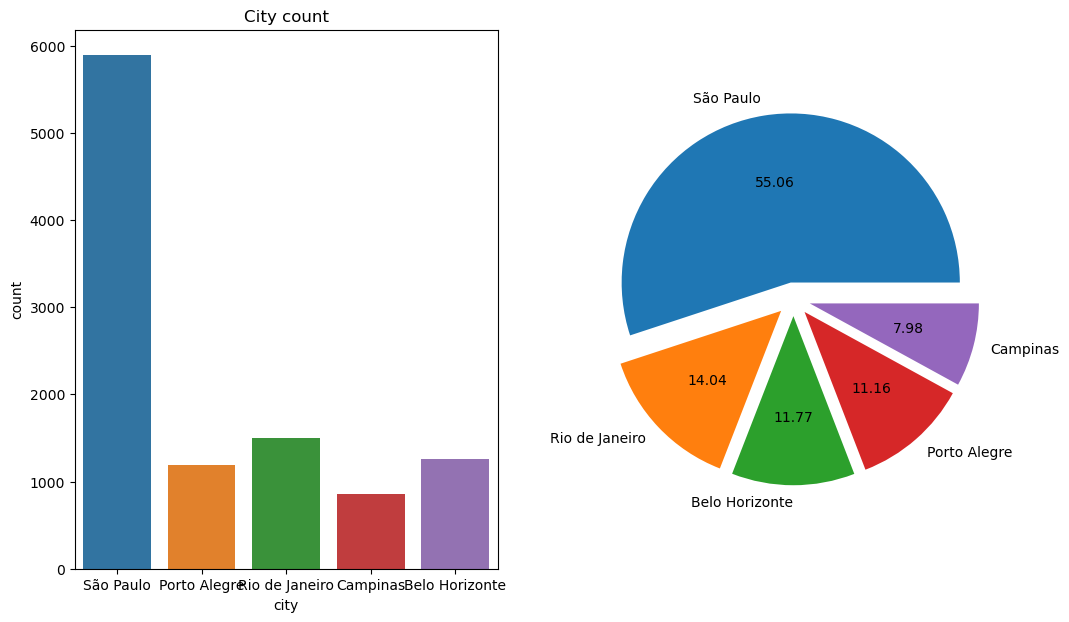

In [72]:
fig,ax=plt.subplots(1,2,figsize=(12,7))
ax[0].set_title('City count')
percentage=data['city'].value_counts()
labels= list(data['city'].value_counts().index)
sb.countplot(x=data['city'],ax=ax[0],linewidth=2,linestyle='-')
plt.pie(percentage,labels=labels,explode=[0.1,0.1,0.1,0.1,0.1],autopct='%.2f')
plt.show()

In [73]:
#rooms

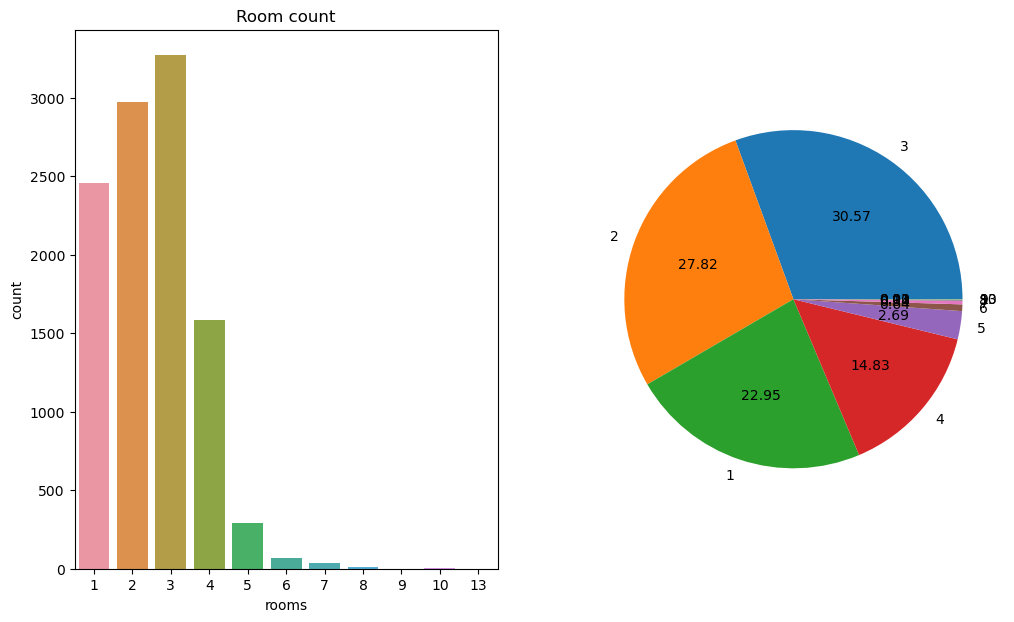

In [74]:
fig,ax=plt.subplots(1,2,figsize=(12,7))
ax[0].set_title('Room count')
percentage=data['rooms'].value_counts()
labels= list(data['rooms'].value_counts().index)
sb.countplot(x=data['rooms'],ax=ax[0],linewidth=2,linestyle='-')
plt.pie(percentage,labels=labels,autopct='%.2f')
plt.show()

In [75]:
#bathroom

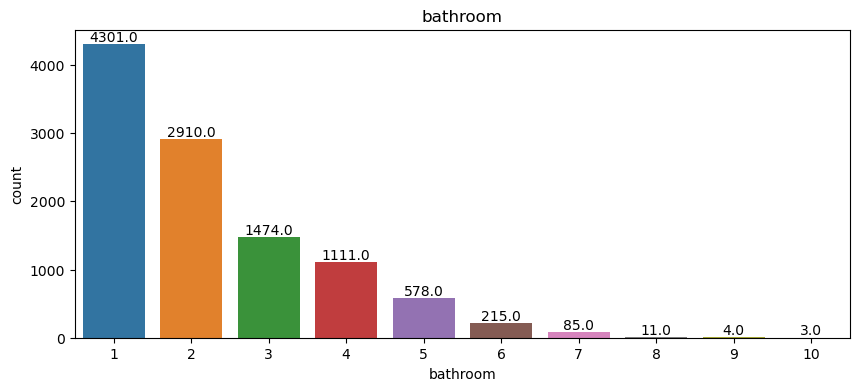

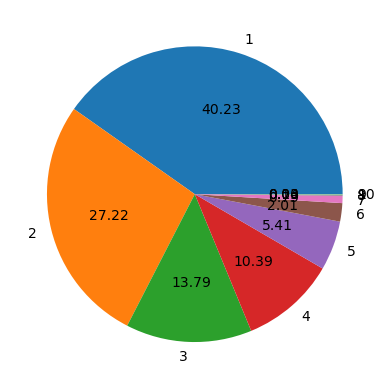

In [9]:
fig,ax=plt.subplots(figsize=(10,4))
ax=sb.countplot(x=cat['bathroom'])
plt.title('bathroom')
for bar in ax.patches:
    count=f"{bar.get_height()}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(count,(x,y),va='bottom',ha='center')
plt.show()
o=cat['bathroom'].value_counts().index
q=cat['bathroom'].value_counts().values
plt.pie(x=q,labels=o,autopct='%.2f')
plt.show()

In [77]:
#parking spaces

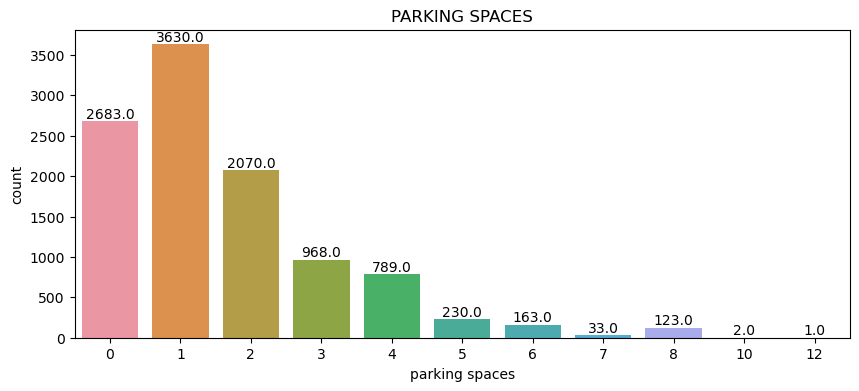

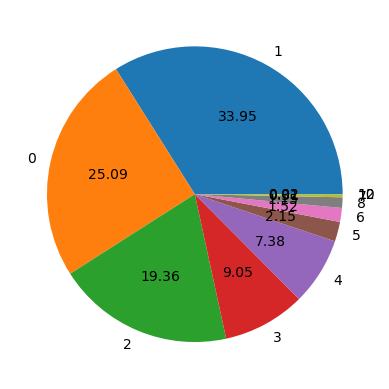

In [78]:
fig,ax=plt.subplots(figsize=(10,4))
ax=sb.countplot(x=cat['parking spaces'])
plt.title('PARKING SPACES')
for bar in ax.patches:
    count=f"{bar.get_height()}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(count,(x,y),va='bottom',ha='center')
plt.show()
o=cat['parking spaces'].value_counts().index
q=cat['parking spaces'].value_counts().values
plt.pie(x=q,labels=o,autopct='%.2f')
plt.show()

In [79]:
#floor

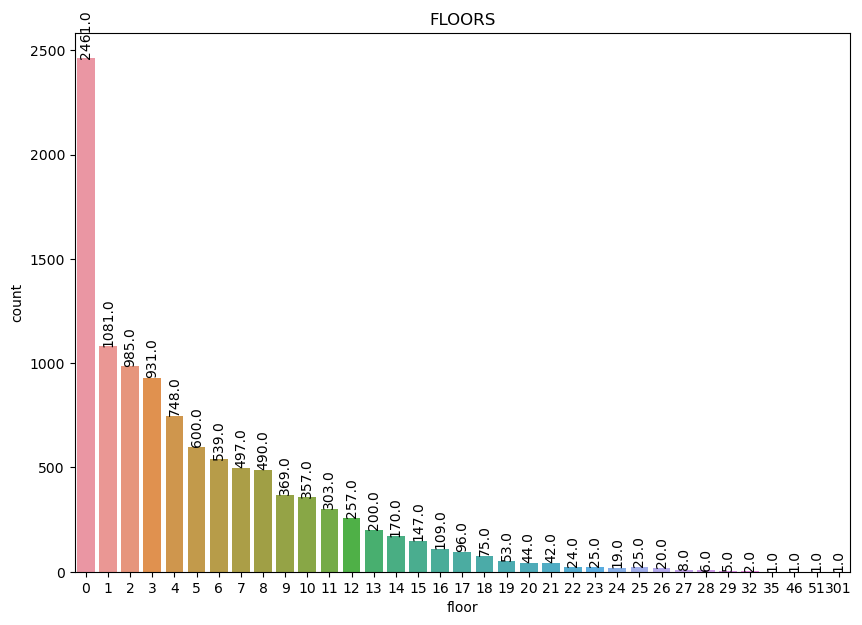

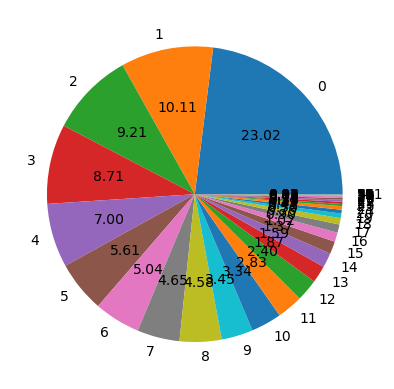

In [11]:
fig,ax=plt.subplots(figsize=(10,7))
ax=sb.countplot(x=cat['floor'])
plt.title('FLOORS')
for bar in ax.patches:
    count=f"{bar.get_height()}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(count,(x,y),va='bottom',ha='center',rotation=90)
plt.show()
o=cat['floor'].value_counts().index
q=cat['floor'].value_counts().values
plt.pie(x=q,labels=o,autopct='%.2f')
plt.show()

In [81]:
#pets allowed or not

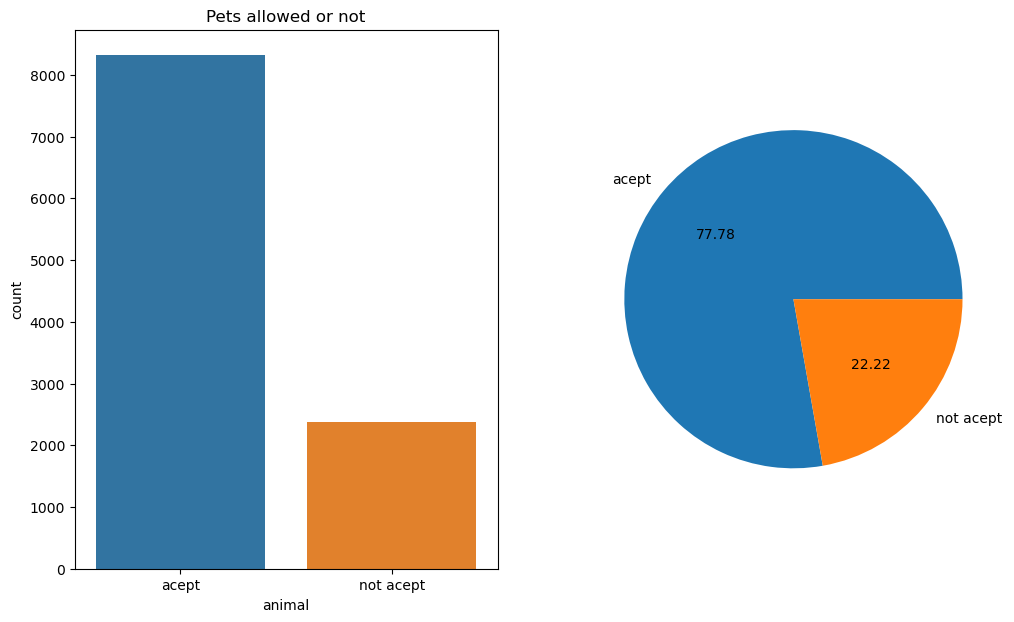

In [82]:
fig,ax=plt.subplots(1,2,figsize=(12,7))
ax[0].set_title('Pets allowed or not')
percentage=data['animal'].value_counts()
labels= list(data['animal'].value_counts().index)
sb.countplot(x=data['animal'],ax=ax[0],linewidth=2,linestyle='-')
plt.pie(percentage,labels=labels,autopct='%.2f')
plt.show()

In [83]:
#furniture

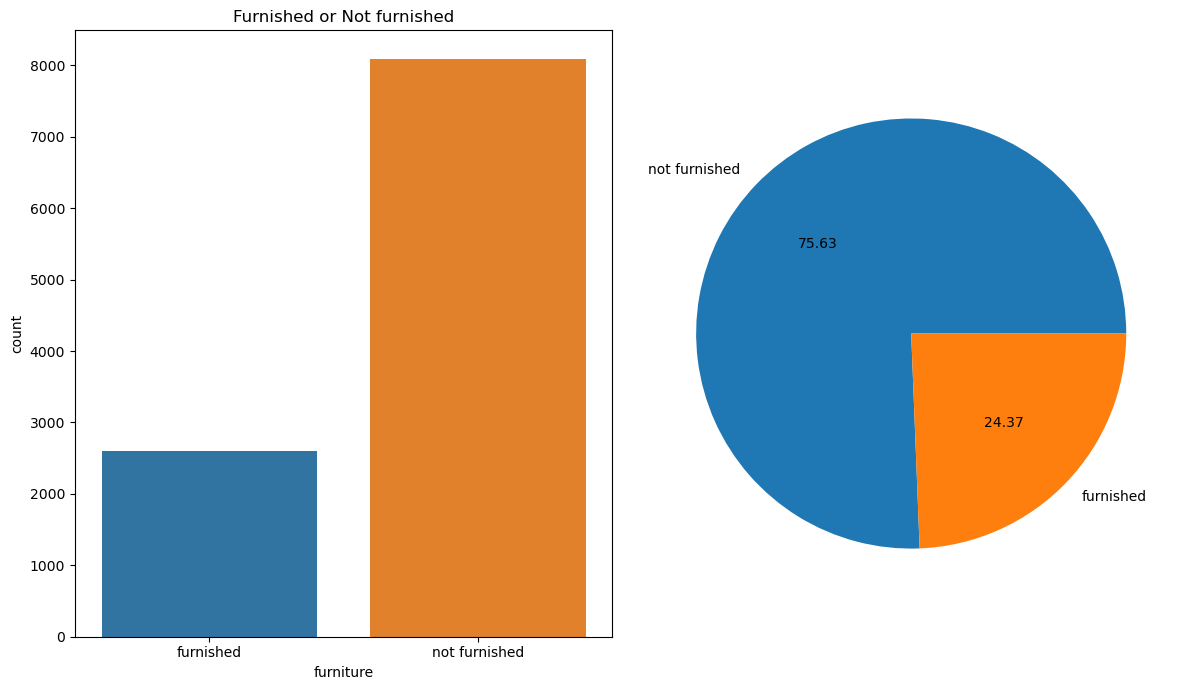

In [84]:
fig,ax=plt.subplots(1,2,figsize=(12,7))
ax[0].set_title('Furnished or Not furnished')
percentage=data['furniture'].value_counts()
labels= list(data['furniture'].value_counts().index)
sb.countplot(x=data['furniture'],ax=ax[0],linewidth=2,linestyle='-')
plt.pie(percentage,labels=labels,autopct='%.2f')
plt.tight_layout()
plt.show()

# Analysis for numerical columns
* Check null value 
* Missing Value Treatment
* Finding unique values

In [85]:
num.columns

Index(['area', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [86]:
def info_num(data):
    for col in numerical:
        unique_values=data[col].unique()
        mode_value=data[col].mode()[0]
        missing_values=data[col].isnull().sum()

        print(f"Unique values in '{col}' are: {unique_values}")
        print(f"Mode of '{col}' is {mode_value}")
        print(f"Number of missing values in '{col}' is {missing_values}")

        if missing_values>0:
            print(f"There are {missing_values} missing values in the '{col}' column")
        print("\n")
info_num(data)

Unique values in 'area' are: [   70   320    80    51    25   376    72   213   152    35    26    46
    36    55   100   330   110    88    56   600    42   160    90    49
    41    64   208    20    32    45   350    38    30    40   300   240
   200   360   250    48   150    60    31   210   280    93    75   194
    65   278    61   130   164   220   108   128    47   170    68    63
   145    85   254   296   133    44    22    50    67   109   400   284
   309    73   155    58    94    76   192   217    95   900    34    62
   180   140    52   999   270    71   500    96   660   107   105   287
    24   154   101   384    57    39    78    28    83   750   258   123
   127   219   420    59   225   480    53   121    43   570    89   173
    91   530    87   136   308   260   120    33   131   161   720   236
    81   125    37   230   450   234   135   395    92   412   190   165
   380    19   124   115   700    15   204   540    23   178   114   113
    69   306   187   3

In [87]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   area                 10692 non-null  int64
 1   hoa (R$)             10692 non-null  int64
 2   rent amount (R$)     10692 non-null  int64
 3   property tax (R$)    10692 non-null  int64
 4   fire insurance (R$)  10692 non-null  int64
 5   total (R$)           10692 non-null  int64
dtypes: int64(6)
memory usage: 501.3 KB


#   hoa (R$)

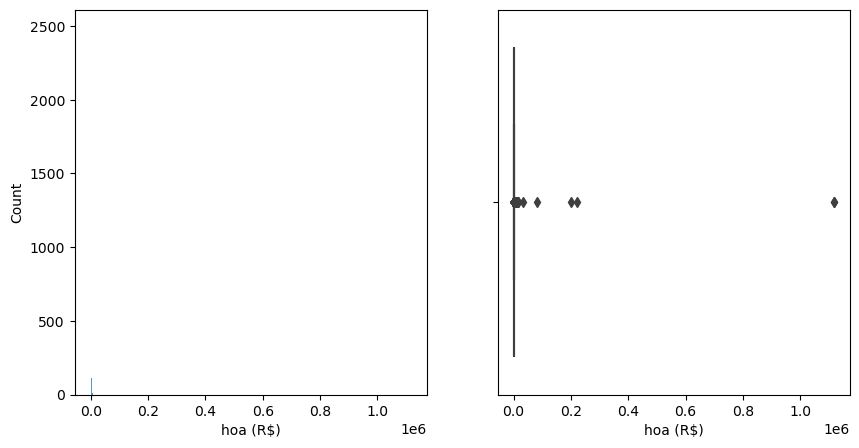

In [88]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=data['hoa (R$)'],ax=ax[0])
sb.boxplot(x=data['hoa (R$)'],ax=ax[1])
plt.show()

outlier treatment

In [89]:
mean= int(data['hoa (R$)'].mean())
s=data[data['hoa (R$)']>2000].index
for index in s:
    data.loc[index,'hoa (R$)']=mean

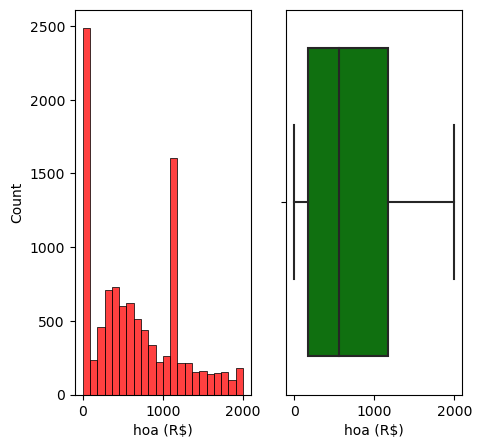

In [90]:
fig,ax=plt.subplots(1,2,figsize=(5,5))
sb.histplot(x=data['hoa (R$)'],ax=ax[0],color='red')
sb.boxplot(x=data['hoa (R$)'],ax=ax[1],color='green')
plt.show()

# area

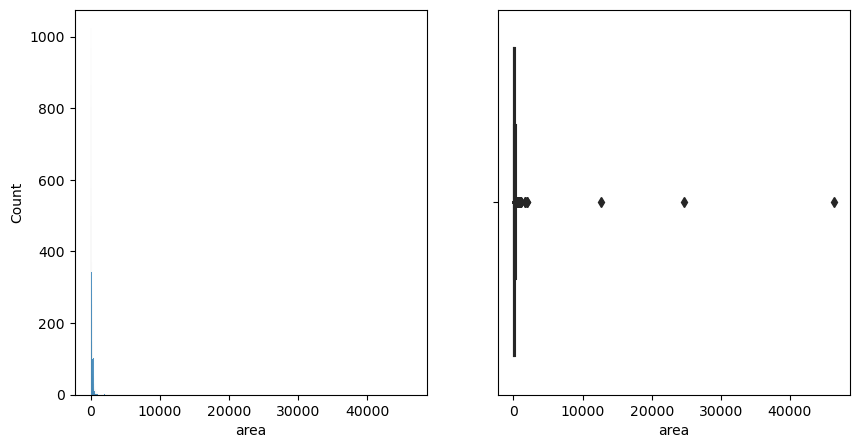

In [91]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=data['area'],ax=ax[0])
sb.boxplot(x=data['area'],ax=ax[1],color='green')
plt.show()

Outlier Analysis

In [92]:
mean=int(data['area'].mean())
x=data[data['area']>400].index
for index in x:
    data.loc[index,'area']=mean

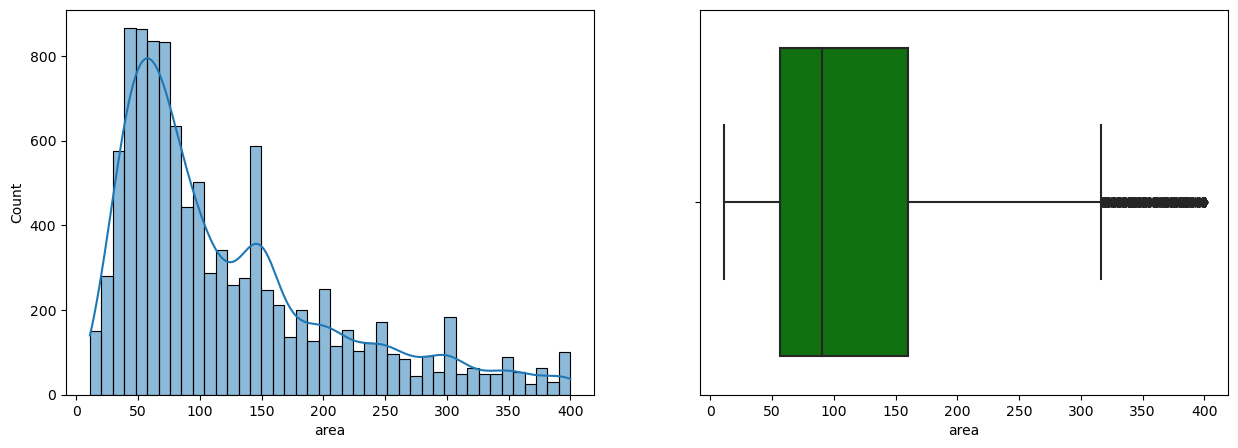

In [93]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sb.histplot(x=data['area'],ax=ax[0],kde=True)
sb.boxplot(x=data['area'],ax=ax[1],color='green')
plt.show()

# rent amount (R$)

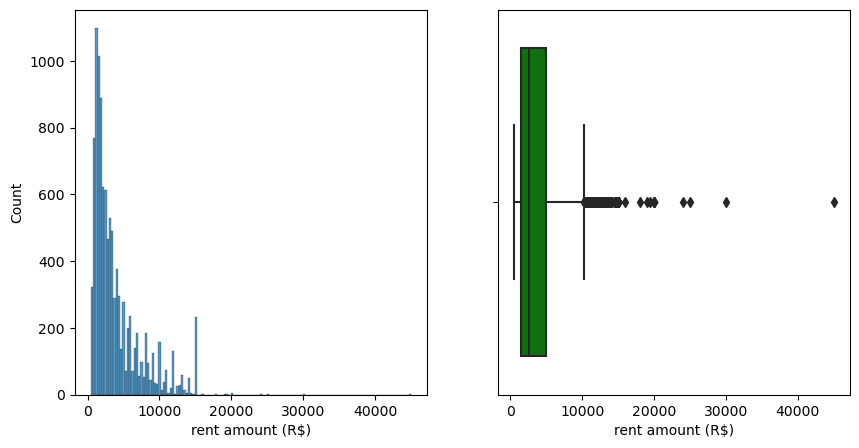

In [94]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=data['rent amount (R$)'],ax=ax[0])
sb.boxplot(x=data['rent amount (R$)'],ax=ax[1],color='green')
plt.show()

outlier treatment

In [95]:
mean= int(data['rent amount (R$)'].mean())
s=data[data['rent amount (R$)']>10000].index
for index in s:
    data.loc[index,'rent amount (R$)']=mean

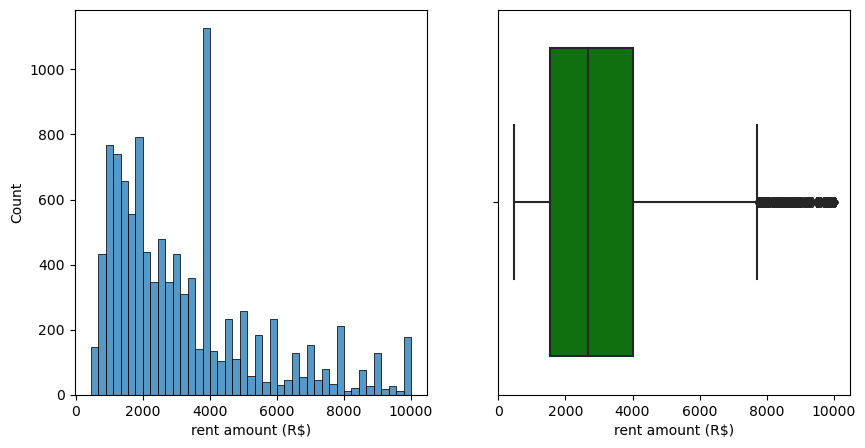

In [96]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=data['rent amount (R$)'],ax=ax[0])
sb.boxplot(x=data['rent amount (R$)'],ax=ax[1],color='green')
plt.show()

# property tax (R$)

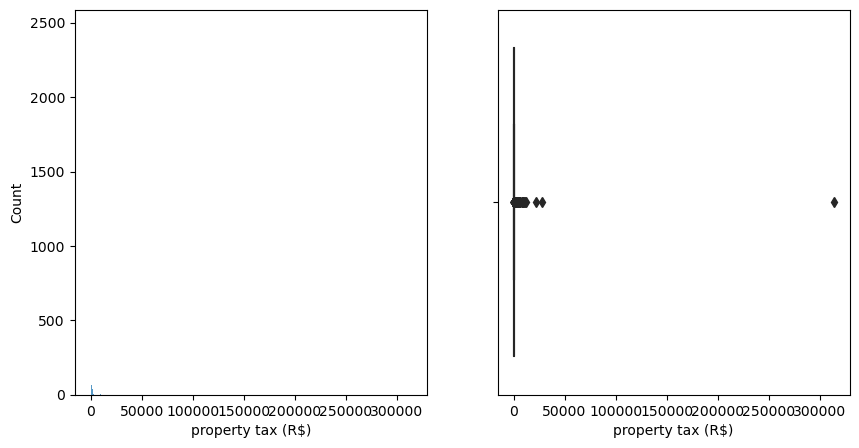

In [97]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=data['property tax (R$)'],ax=ax[0])
sb.boxplot(x=data['property tax (R$)'],ax=ax[1],color='green')
plt.show()

outlier treatment

In [98]:
mean= int(data['property tax (R$)'].mean())
y=data[data['property tax (R$)']>1000].index
for index in y:
    data.loc[index,'property tax (R$)']=mean

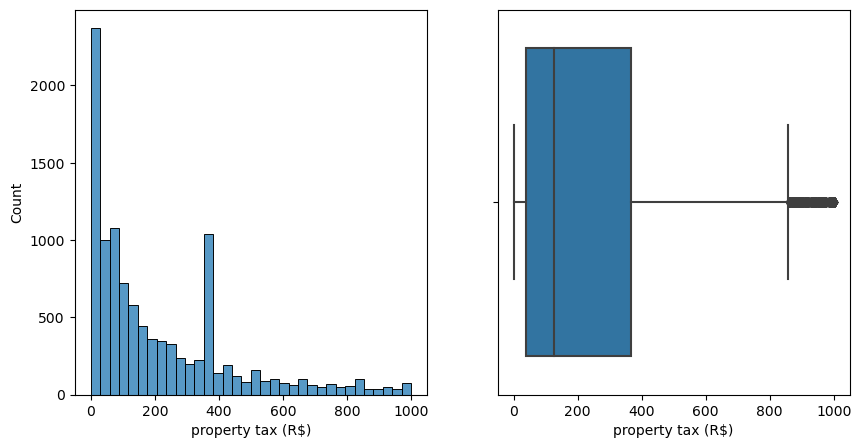

In [99]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=data['property tax (R$)'],ax=ax[0])
sb.boxplot(x=data['property tax (R$)'],ax=ax[1])
plt.show()

# fire insurance (R$)

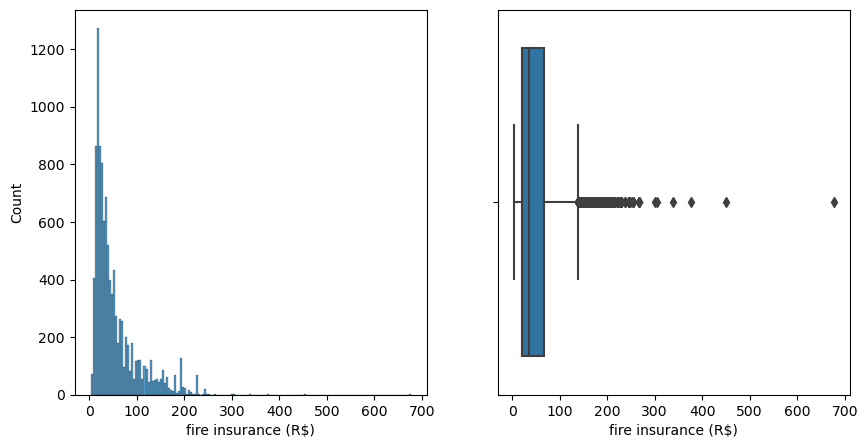

In [100]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=data['fire insurance (R$)'],ax=ax[0])
sb.boxplot(x=data['fire insurance (R$)'],ax=ax[1])
plt.show()

In [101]:
mean= int(data['fire insurance (R$)'].mean())
s=data[data['fire insurance (R$)']>200].index
for index in s:
    data.loc[index,'fire insurance (R$)']=mean

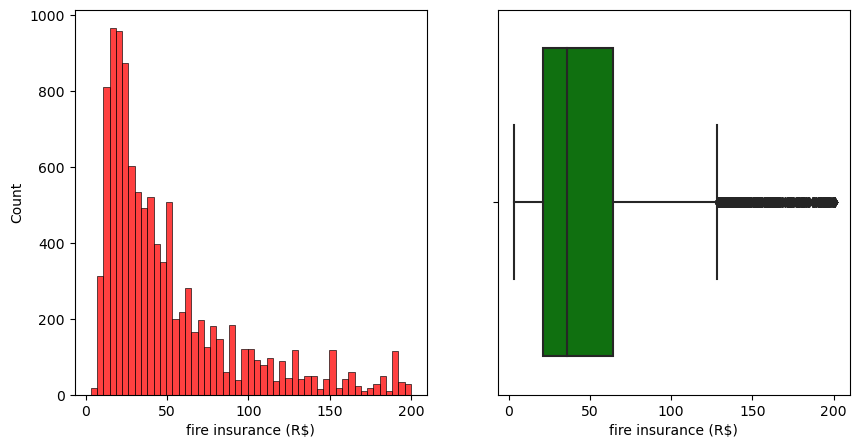

In [102]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=data['fire insurance (R$)'],ax=ax[0],color='red')
sb.boxplot(x=data['fire insurance (R$)'],ax=ax[1],color='green')
plt.show()

# total (R$)

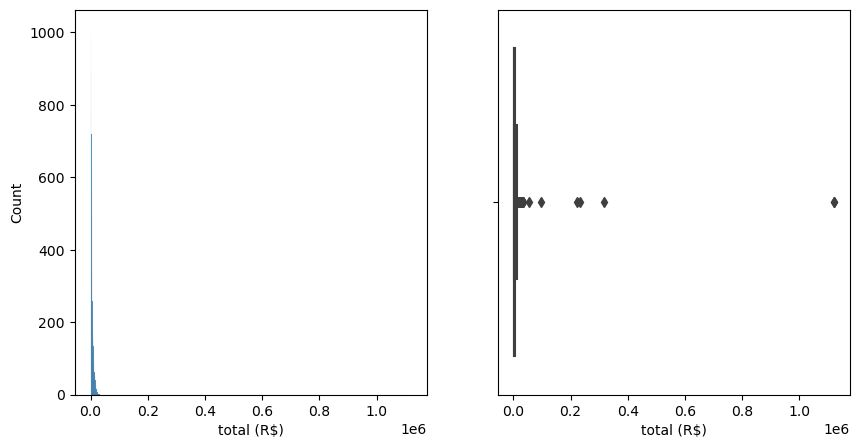

In [3]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=data['total (R$)'],ax=ax[0])
sb.boxplot(x=data['total (R$)'],ax=ax[1])
plt.show()

outlier treatment

In [4]:
df=data.copy()
mean=int(df['total (R$)'].mean())
z=df[df['total (R$)']>10500].index
for index in z:
    df.loc[index,'total (R$)']=mean

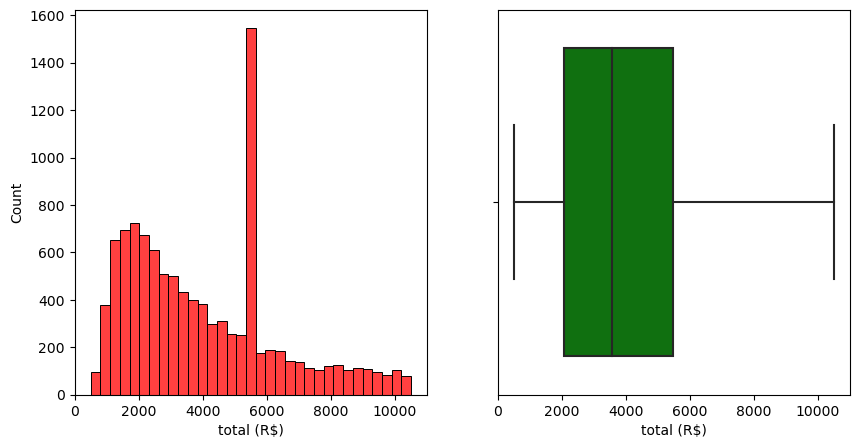

In [5]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=df['total (R$)'],ax=ax[0],color='red')
sb.boxplot(x=df['total (R$)'],ax=ax[1],color='green')
plt.show()

# Level 2

In [106]:
cat.columns

Index(['city', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal',
       'furniture'],
      dtype='object')

In [107]:
num.columns

Index(['area', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')

# TOTAL ON CITY

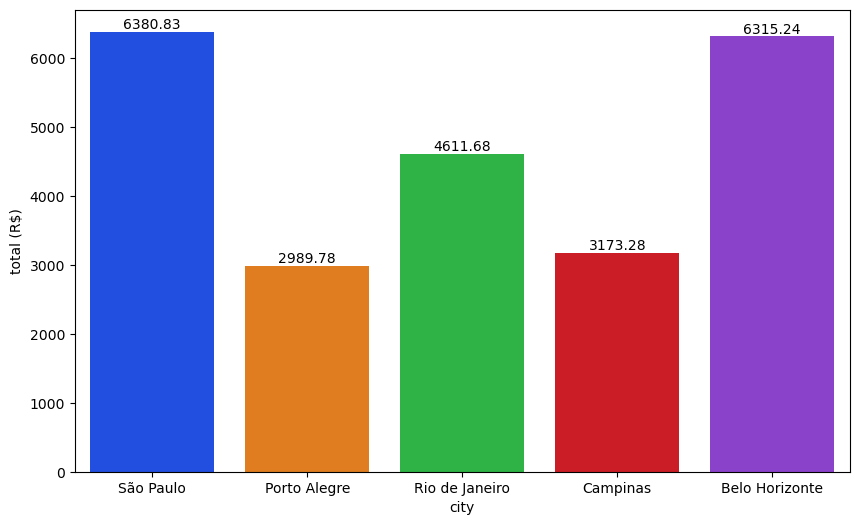

In [111]:
fig,ax=plt.subplots(figsize=(10,6))
sb.barplot(x='city',y='total (R$)',data=data,palette='bright',ci=False)
count(ax,data)
plt.show()

Here total rent in city Porto Alegre is cheaper.

# Total on Furniture

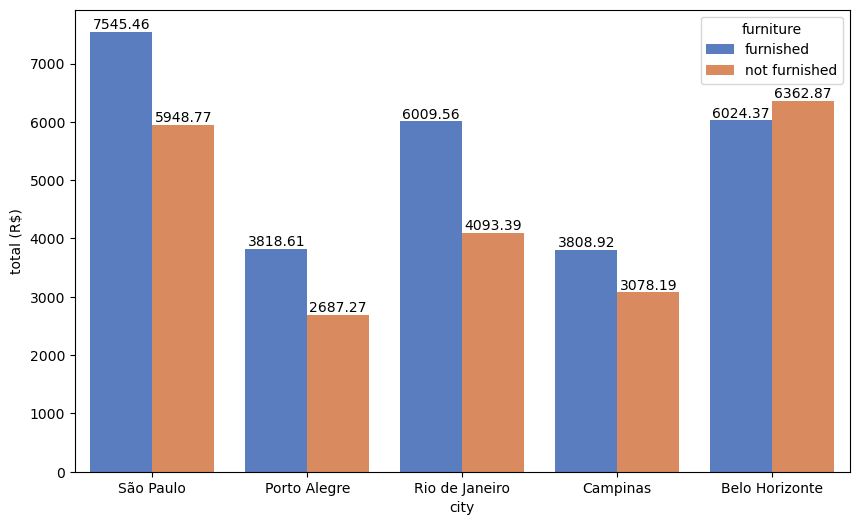

In [112]:
fig,ax=plt.subplots(figsize=(10,6))
sb.barplot(x='city',y='total (R$)',hue='furniture',data=data,palette='muted',ci=False)
count(ax,data)
plt.show()

Here Porto-Alegre and Campinas have furnished houses with low rent.

# Total on Pets

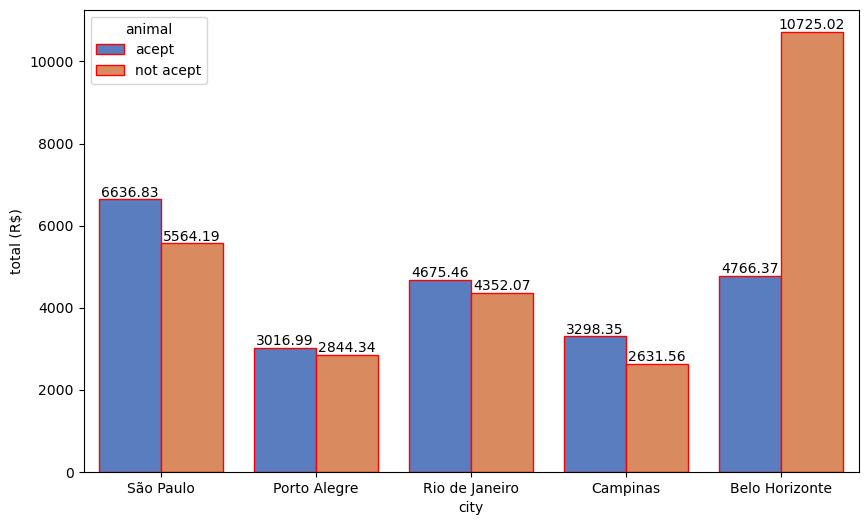

In [113]:
fig,ax=plt.subplots(figsize=(10,6))
sb.barplot(x='city',y='total (R$)',hue='animal',edgecolor='red',data=data,palette='muted',ci=False)
count(ax,data)
plt.show()

Here cities Port Alegre and Campinas allows pets and also the rent is low

# Rent amount on room

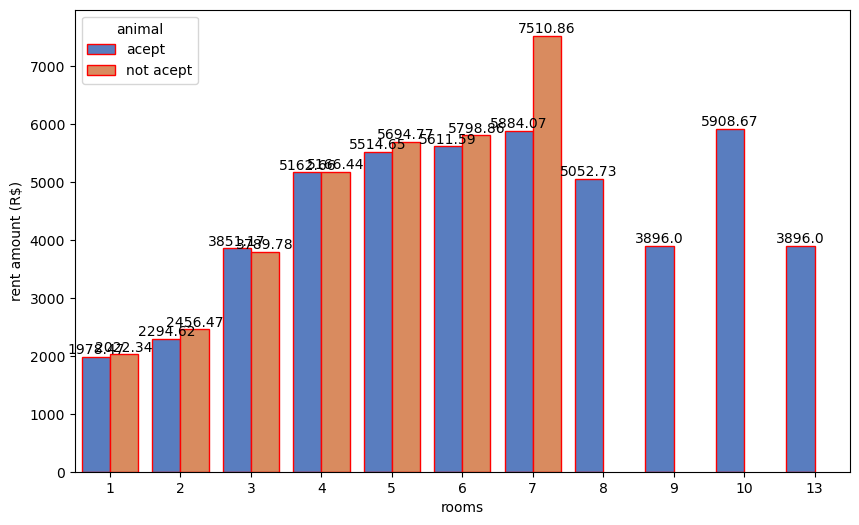

In [114]:
fig,ax=plt.subplots(figsize=(10,6))
sb.barplot(x='rooms',y='rent amount (R$)',hue='animal',edgecolor='red',data=data,palette='muted',ci=False)
count(ax,data)
plt.show()

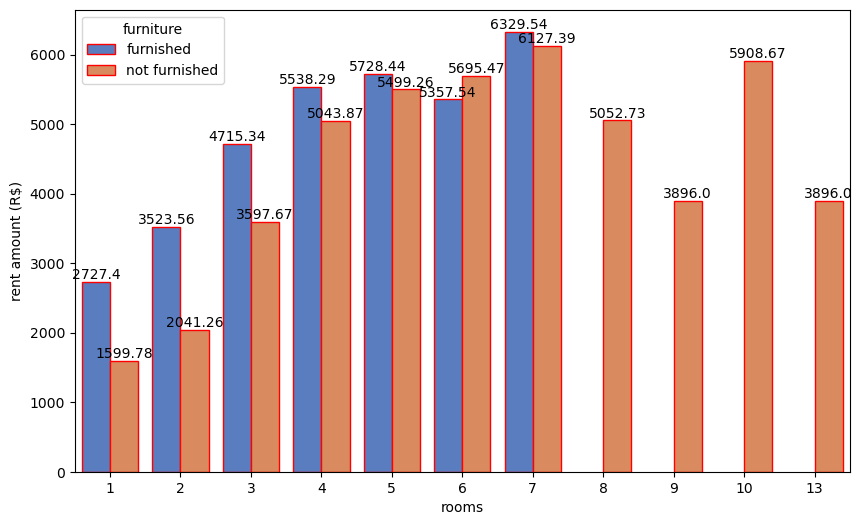

In [115]:
fig,ax=plt.subplots(figsize=(10,6))
sb.barplot(x='rooms',y='rent amount (R$)',hue='furniture',edgecolor='red',data=data,palette='muted',ci=False)
count(ax,data)
plt.show()

Here 2 room houses are affordable and comfortable for a family that are 
furnished and pet friendly(allowed).

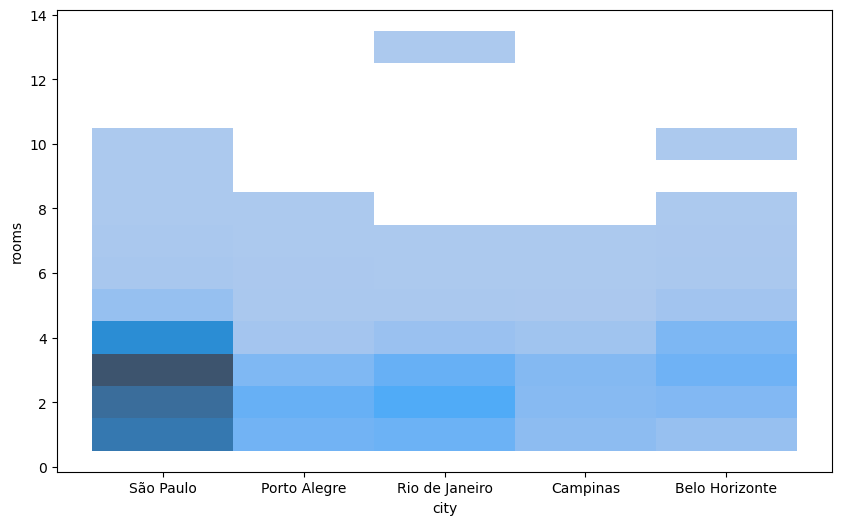

In [116]:
fig,ax=plt.subplots(figsize=(10,6))
sb.histplot(x='city',y='rooms',data=data,palette='bright',discrete=True)
plt.show()

Here city Sao Paulo can be recommended for 2 room houses.

# Analysis of room, parking space and Total

Here we take houses having <=3 rooms, beacuse it is high demanded.

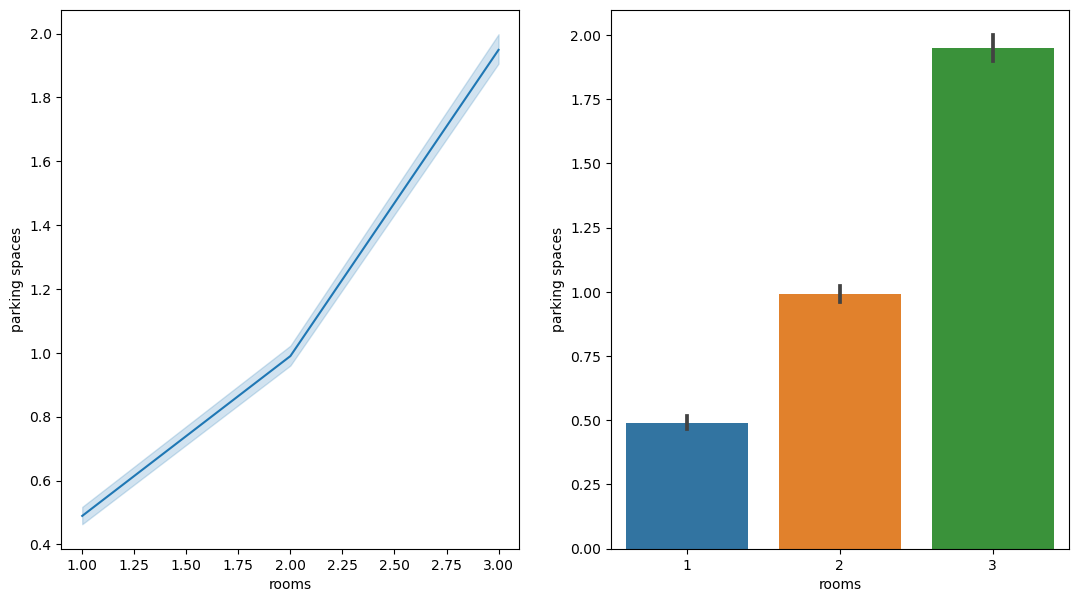

In [117]:
a=data[data['rooms']<=3]
fig,ax=plt.subplots(1,2,figsize=(13,7))
sb.lineplot(x='rooms',y='parking spaces',data=a,ax=ax[0],ci=95)
sb.barplot(x='rooms',y='parking spaces',data=a,ax=ax[1])
plt.show()

here we can see that as the number of room increase, the parking space also increases

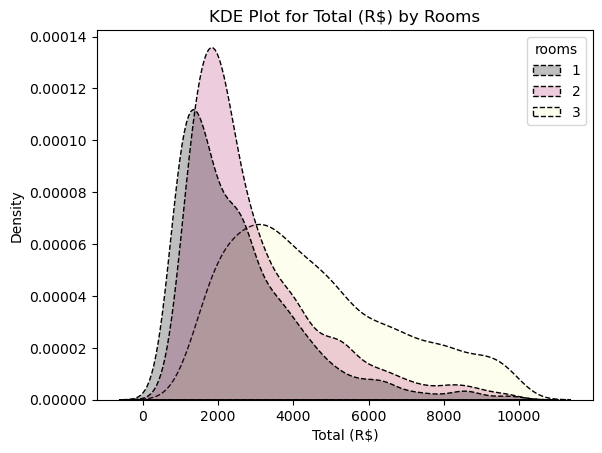

In [5]:
rms=data_f[data_f['rooms']<=3]
sb.kdeplot(data=rms,x='total (R$)',hue='rooms',palette='magma',fill=True,edgecolor='black',linestyle='--')
plt.xlabel('Total (R$)')
plt.ylabel('Density')
plt.title('KDE Plot for Total (R$) by Rooms')
plt.show()

# City and Room

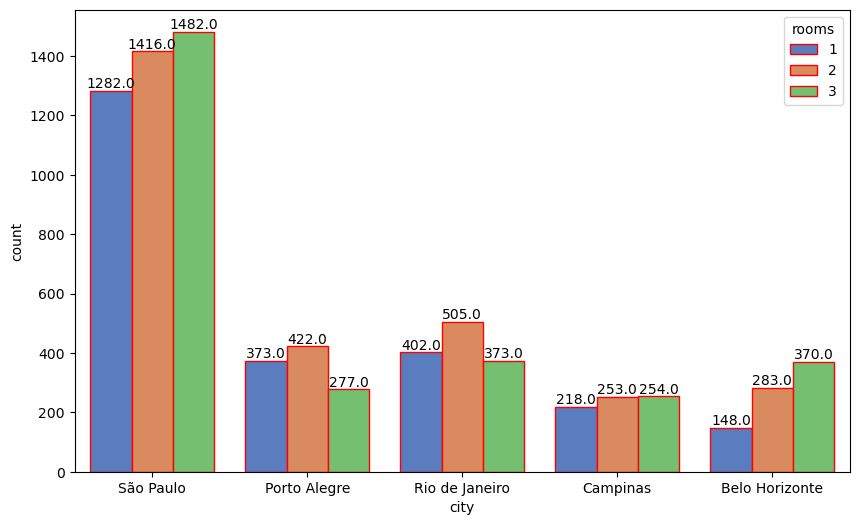

In [120]:
fig,ax=plt.subplots(figsize=(10,6))
sb.countplot(x='city',hue='rooms',edgecolor='red',data=b,palette='muted')
count(ax,data)
plt.show()

Here the availability of rooms are more in Sao Paulo, but rent will be high.

# Total rent and Parking Space
* also considering furniture

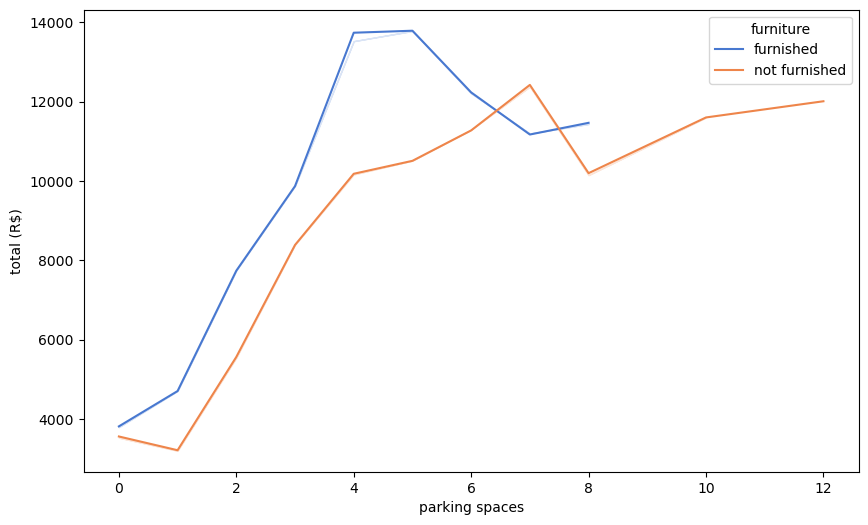

In [121]:
fig,ax=plt.subplots(figsize=(10,6))
sb.lineplot(x='parking spaces',y='total (R$)',hue='furniture',data=data,palette='muted',ci=False)
count(ax,data)
plt.show()

As the parking space increases, we can see the total amount also increase along with that and if the house is furnished, again it becomes more costlier. We can see easily in graph

# Price for house having parking space <= 2

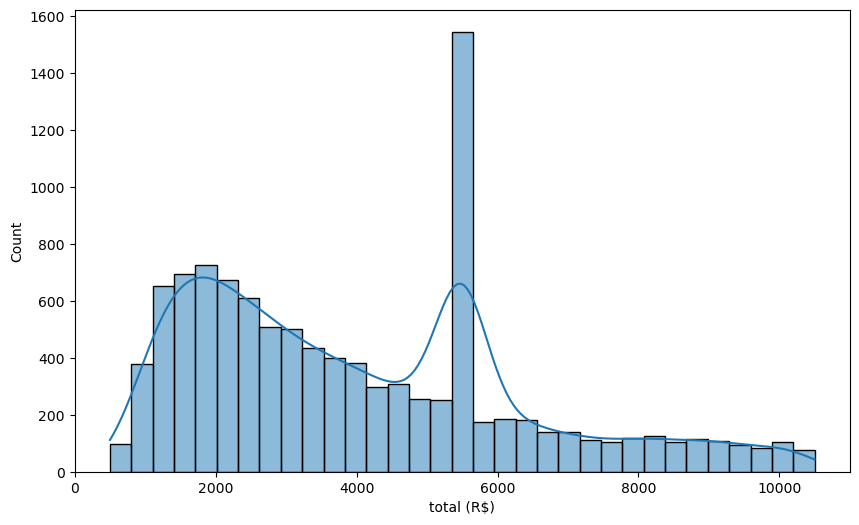

In [122]:
dat=df[df['parking spaces']<=2]
fig,ax=plt.subplots(figsize=(10,6))
sb.histplot(data=df,x='total (R$)',kde=True)
plt.show()

The average rent is near 2000 for 2 parking space houses.

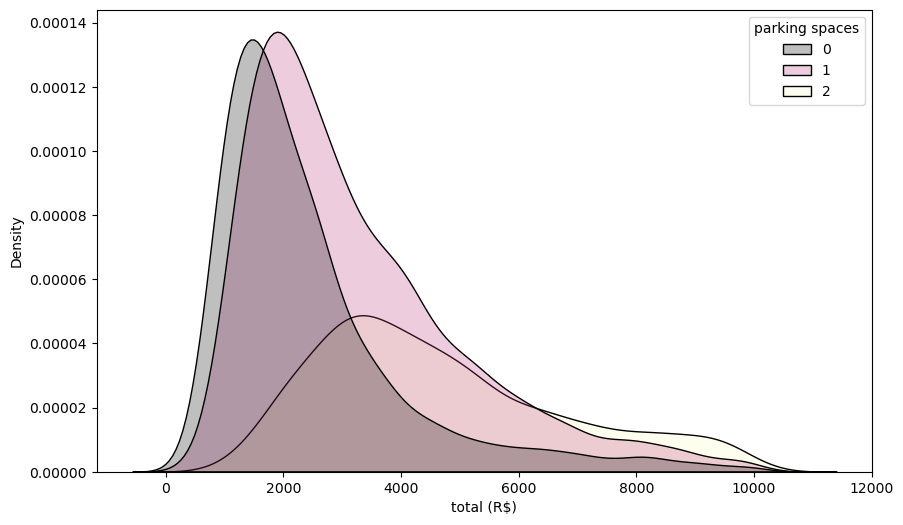

In [10]:
data_f1=data_f[data_f['parking spaces']<=2]
fig,ax=plt.subplots(figsize=(10,6))
sb.kdeplot(data=data_f1,x='total (R$)',hue='parking spaces',palette='magma',fill=True,edgecolor='black')
plt.show()

Here there in not much difference in 0 and 1, So taking 1 parking space atleast would be a better option. 

# City, Total rent and Parking Space

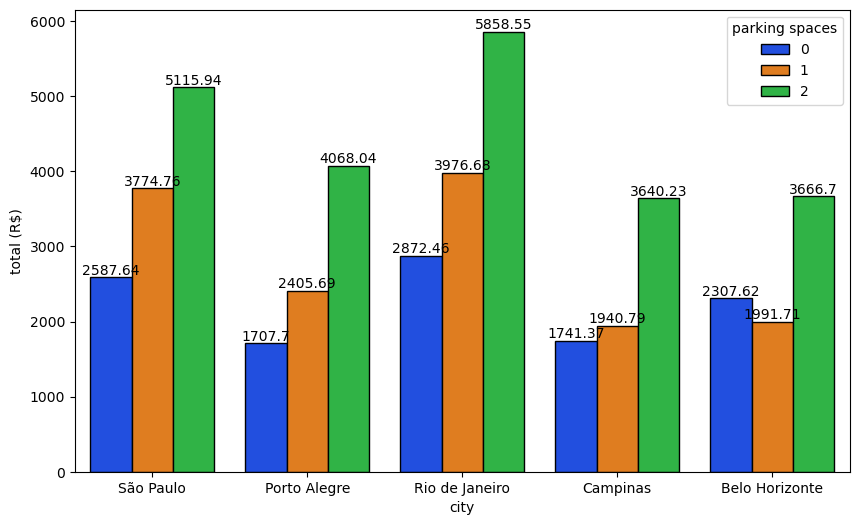

In [135]:
fig,ax=plt.subplots(figsize=(10,6))
sb.barplot(x='city',y='total (R$)',hue='parking spaces',data=data_f1,palette='bright',edgecolor='black',ci=False)
count(ax,data_f1)
plt.show()

Looking for 1 parking space and less affordable rent, then they can choose Campinas and Belo Horizonte. And if they want no parking space, they can choose Porto Alegre.

# City and Count of Parking Space

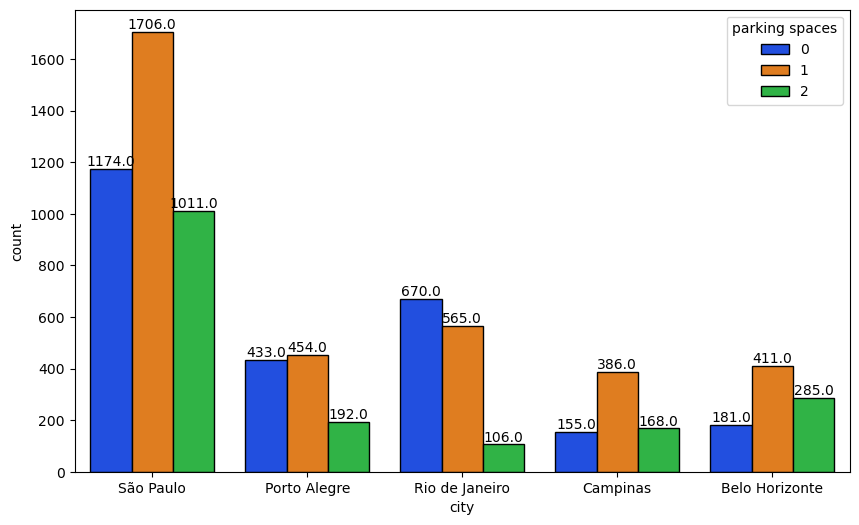

In [137]:
fig,ax=plt.subplots(figsize=(10,6))
sb.countplot(x='city',hue='parking spaces',data=data_f1,palette='bright',edgecolor='black')
count(ax,data_f1)
plt.show()

Porto ALegre and Rio-de-Janerio can be considered for lesser parking space and for affordable rents too.

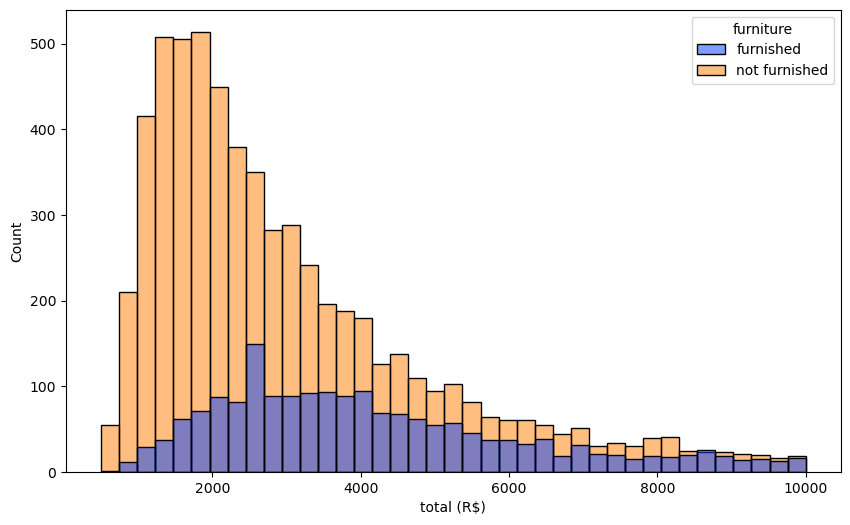

In [12]:
fig,ax=plt.subplots(figsize=(10,6))
sb.histplot(x='total (R$)',hue='furniture',data=data_f1,palette='bright',edgecolor='black')
plt.show()

Unfurnished houses are chaper. It's visble in the graph.

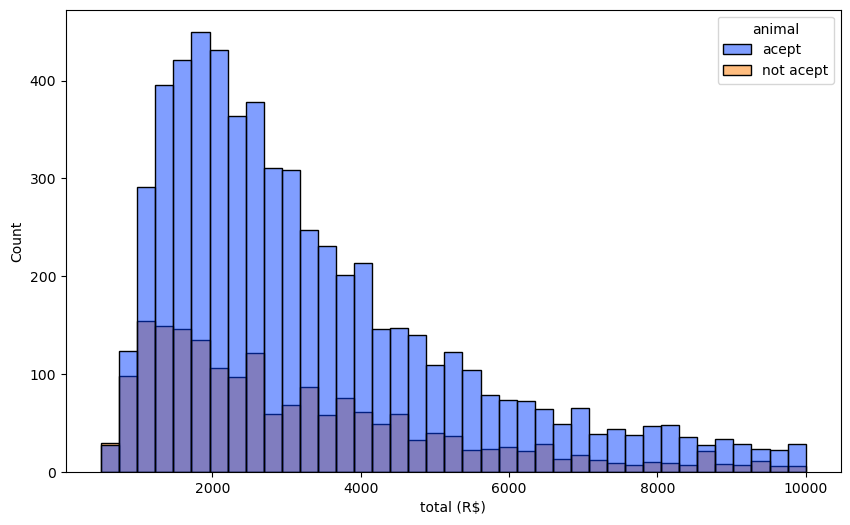

In [13]:
fig,ax=plt.subplots(figsize=(10,6))
sb.histplot(x='total (R$)',hue='animal',data=data_f1,palette='bright',edgecolor='black')
plt.show()

Price increase when looking for pet allowed houses. So houses where pets are not allowed are cheaper.

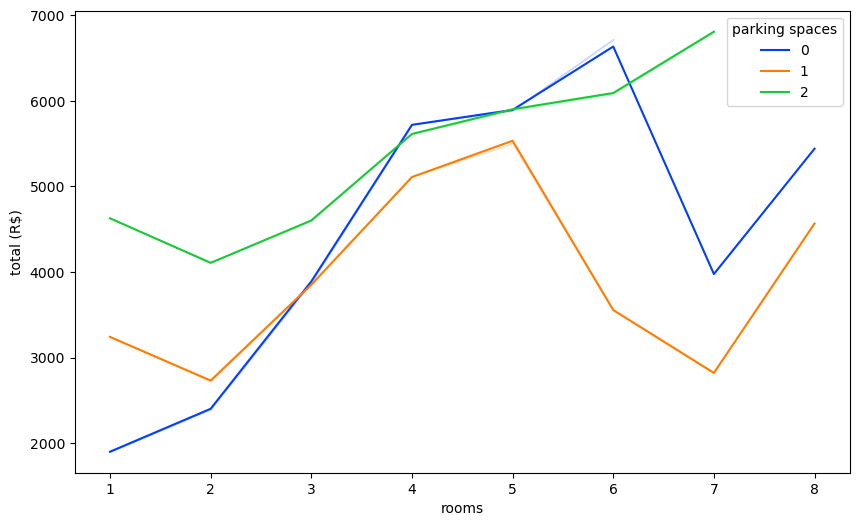

In [16]:
data_f=data_f[data_f['parking spaces']<=2]
fig,ax=plt.subplots(figsize=(10,6))
sb.lineplot(data=data_f1,x='rooms',y='total (R$)',hue='parking spaces',palette='bright',ci=False)
plt.show()

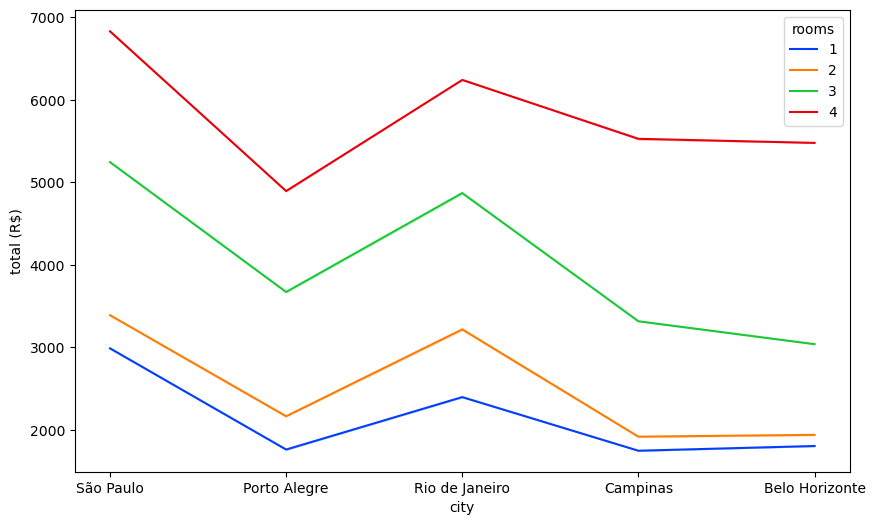

In [6]:
data_f1=data_f[data_f['rooms']<=4]
fig,ax=plt.subplots(figsize=(10,6))
sb.lineplot(data=data_f1,x='city',y='total (R$)',hue='rooms',palette='bright',ci=False)
plt.show()

Campinas is affordable for 2 or less rooms

# My Recommendations:

1. Here the most cheapest total cost rent is in Porto Alegre city.

2. If you need Furnished house with low rent, then first option is Porto Alegre, and second is Campinas.

3. Most of the houses in Porto Alegre and Campinas accepts pet and also cheaper.

4. 2 room houses are affordable and more comfortable if you are with family than a 1 room house.

5. And if you want a furnished pet friendly house also 2 room house is a better option.

6. If you are moving alone, then 1 room house will be more cheaper and more pet allowed.

7. Here more 2 room houses are available in Sao Paulo city.

8. As the parking space increases, total amount also increase along with that. And if you want furnished too along with parking space, the cost will again go up.

9. As the number of room increases, the parking space also inreases as usual because as the family size increases, number of vehicles also increases, so the cost will go up.

10. For 2 parking spaces, the average total cost is around 2000.

11. Looking for 1 parking space and less affordable rent, then they can choose Campinas and Belo Horizonte. And if they want no parking space, they can choose Porto Alegre.

12. Porto ALegre and Rio-de-Janerio can be considered for lesser parking space and for affordable rents too.

13. One should go for atleast one 1 parking space, because it may require in future.

14. Price increase when looking for pet allowed houses. So houses where pets are not allowed are cheaper.

15. If you are looking for 2 or less room, then you may look in Campinas city.

16. If you are looking for 4 room or more, then you can choose upto 2 to 3 parking spaces with zero extra cost.
